## Main routine SMO Modification 1 Keerthi et al.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import scipy
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics.pairwise import pairwise_kernels
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
train = pd.read_csv('C:/Users/LMatt/OneDrive/Dokumente/Mathe/Machine Learning/Projekt/digits_train.csv')

In [21]:
images = ["%s%s" %("pixel",pixel_no) for pixel_no in range(0,28**2)]
train_images = np.array(train[images], dtype=np.float)
train_labels = np.array(train['label'])
label0 = np.array([1 if i==0 else -1 for i in train_labels]) 

In [22]:
# "label" is an 1 x l array containing the labels
# "data" is an d x l array containing the data points

#data = np.transpose(np.array([[-1,1],[-2,-3],[1,5],[0.5,-7]]))
#label = np.array([-1,-1,-1,1])
number_samples = 100
data = np.transpose(train_images[:number_samples])/100
label = label0[:number_samples]
#d = 784
#l = 42000
#data = np.random.rand(d,l)
#label = np.random.rand(l)
#label = 2*(label>0.5)-1
l = data.shape[1]
print(np.shape(data))
C = 1
tol = 1e-6
eps = 1e-9

(784, 100)


In [23]:
#data = np.genfromtxt('data.csv',delimiter=',')
#label = np.genfromtxt('label.csv',delimiter=',')
#l = data.shape[1]

In [24]:
def takeStep(i1,i2):
    global b_low
    global b_up
    global i_low
    global i_up
    
    if i1 == i2: 
        return 0
    alph1 = alpha[i1]
    alph2 = alpha[i2]
    y1 = label[i1]
    y2 = label[i2]
    
    
    
    # hier liegt der Fehler!!!!!!!!!!!
    
    #das muss vermutlich so sein
    #F1 = fcache[i1]
    F1 = F(i1,alpha)
    
    #das sollte anders gehen 
    F2 = fcache[i2]
    #F2 = F(i2,alpha)
    #print(F2,F3)
    s = y1*y2
    
    
    
    if s == -1:
        L = max(0,alph2-alph1)
        H = min(C,C+alph2-alph1)
    else:
        L = max(0,alph2+alph1-C)
        H = min(C,alph2+alph1)
    
    if L == H: return 0
    
    k11 = kernel(data[:,i1],data[:,i1])
    k12 = kernel(data[:,i1],data[:,i2])
    k22 = kernel(data[:,i2],data[:,i2])
    
    eta = 2*k12 - k11 - k22
    if eta < 0:
        a2 = alph2 - y2*(F1-F2)/eta
        if a2 < L:
            a2 = L
        elif a2 > H:
            a2 = H
    else:
        raise ValueError('Error: eta == 0')
    
    if abs(a2-alph2) < eps*(a2+alph2+eps):
        return 0
    
    a1 = alph1 + s*(alph2-a2)
    # maybe update weight vector here on the fly
    
    # update alpha
    alpha[i1] = a1
    alpha[i2] = a2
    
    # update I
    I[:,i1] =  I_membership(a1,y1)
    I[:,i2] =  I_membership(a2,y2)
    
    # update fcache[i] here for i in I_0:
    ind_0 = (np.nonzero(I[0,:]))[0]
    for i in ind_0:
        #fcache[i] = fcache[i] + y1*(a1-alph1)*kernel(data[:,i],data[:,i1]) + y2*(a2-alph2)*kernel(data[:,i],data[:,i2])
        fcache[i] = F(i,alpha)
    
    # update fcache for indices i1 and i2
    #fcache[i1] = fcache[i1] + y1*(a1-alph1)*k11 + y2*(a2-alph2)*k12
    #fcache[i2] = fcache[i2] + y1*(a1-alph1)*k12 + y2*(a2-alph2)*k22
    fcache[i1] = F1 + y1*(a1-alph1)*k11 + y2*(a2-alph2)*k12
    fcache[i2] = F2 + y1*(a1-alph1)*k12 + y2*(a2-alph2)*k22
    #fcache[i1] = F(i1,alpha)
    #fcache[i2] = F(i2,alpha)
    
    b_low = -float('inf')
    b_up = - b_low
    
    
    
    
    # hier liegt auch der Fehler!!!!!!!!!!!!!!!!!!!!!11
    
    if np.size(ind_0) > 0:
        for i in ind_0:
            if fcache[i] > b_low:
                b_low = fcache[i]
                #b_low = F(i,alpha)
                i_low = i
            if fcache[i] < b_up:
                b_up = fcache[i]
                #b_up = F(i,alpha)
                i_up = i

                
                

       
    memb1 = I_membership_no(a1,y1)
    memb2 = I_membership_no(a2,y2)
    if memb1 in (1,2) and fcache[i1] < b_up:
        b_up = fcache[i1]
        #b_up = F(i1,alpha)
        i_up = i1
    if memb1 in (3,4) and fcache[i1] > b_low:
        b_low = fcache[i1]
        #b_low = F(i1,alpha)
        i_low = i1
    if memb2 in (1,2) and fcache[i2] < b_up:
        b_up = fcache[i2]
        #b_up = F(i2,alpha)
        i_up = i2
    if memb2 in (3,4) and fcache[i2] > b_low:
        b_low = fcache[i2]
        #b_low = F(i2,alpha)
        i_low = i2

    return 1

In [25]:
def examineExample(i2):
    global b_low
    global b_up
    global i_low
    global i_up

    
    y2 = label[i2]
    alph2 = alpha[i2]
    memb_i2 = I_membership_no(alph2,y2);
    
    # look up or compute F2:= F_i2
    if memb_i2 == 0:
        #F2 = F(i2,alpha)
        F2 = fcache[i2]
    else:
        #F2 = F(i2,alpha)
        #fcache[i2] = F2
        fcache[i2] = F(i2,alpha)
        F2 = fcache[i2]
        # in case i2 not in I_0, see if F2 changes or estimate of b_low or b_up
        if memb_i2 in (1,2) and F2 < b_up:
            b_up = F2
            i_up = i2
        elif memb_i2 in (3,4) and F2 > b_low:
            b_low = F2
            i_low = i2
    
    optimality = 1
    if memb_i2 in (0,1,2):
        if b_low - F2 > 2*tol:
            optimality = 0
            i1 = i_low
    if memb_i2 in (0,3,4):
        if F2 - b_up > 2*tol:
            optimality = 0
            i1 = i_up
    if optimality == 1:
        return 0
    
    if memb_i2 == 0:
        if b_low - F2 > F2 - b_up:
            i1 = i_low
        else:
            i1 = i_up
            
    if takeStep(i1,i2):
        return 1
    else:
        return 0

In [26]:
def I_membership(a,y):
    if 0 < a and a < C:
        return np.array([1,0,0,0,0])
    elif a == 0 and y == 1:
        return np.array([0,1,0,0,0])
    elif a == C and y == -1:
        return np.array([0,0,1,0,0])
    elif a == C and y == 1:
        return np.array([0,0,0,1,0])
    else:
        return np.array([0,0,0,0,1])
    

def I_membership_no(a,y):
    if 0 < a < C:
        return 0
    elif a == 0 and y == 1:
        return 1
    elif a == C and y == -1:
        return 2
    elif a == C and y == 1:
        return 3
    else:
        return 4

In [27]:
'''def kernel(v1,v2):
    return np.dot(v1,v2)'''

'def kernel(v1,v2):\n    return np.dot(v1,v2)'

In [28]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-sigma*np.linalg.norm(x1-x2)**2)

def kernel(x1,x2):
    sigma = float(100)
    return gaussian_kernel(x1, x2, sigma)

In [29]:
def F(i,alpha):
    out = - label[i]
    for j in range(l):
        out = out + alpha[j]*label[j]*kernel(data[:,i],data[:,j])
    return out


Main routine

In [30]:
alpha = np.zeros(l)
fcache = np.array(-label, dtype=np.float)
b_up = -1
b_low = 1

I = np.zeros((5,l), dtype=np.int)
I[1,:] = (label == 1).astype(int)
I[4,:] = (label == -1).astype(int)


i_up = min(np.nonzero(I[1,:])[0])
i_low = min(np.nonzero(I[4,:])[0])


numChanged = 0
examineAll = 1

iter = 0

while numChanged > 0 or examineAll:
    numChanged = 0
    if examineAll:
        for i in range(l):
            numChanged = numChanged + examineExample(i)
    else:
        for i in (np.nonzero(I[0,:]))[0]:
            numChanged = numChanged + examineExample(i)
            if b_up > b_low - 2*tol:
                numChanged = 0
                break
    if examineAll == 1:
        examineAll = 0
    elif numChanged == 0:
        examineAll = 1
    
    iter = iter + 1
    
# compute the weight vector    
w = 0
for i in range(l):
    w = w + alpha[i]*label[i]*data[:,i]

# compute b
ind = 0
while(alpha[ind] <= 0):
    ind = ind + 1
b = kernel(w,data[:,ind]) - label[ind]
print(alpha)
#print(w,b)
#print(iter)


        

[ 0.0989011   1.          0.09890098  0.09890109  1.          1.
  0.09890134  0.09890062  0.0989011   0.0989011   0.09890134  0.0989011
  0.09890061  0.09890109  0.09890079  0.0989008   0.09890061  1.
  0.09890062  0.09890109  0.09890109  0.09890062  0.0989011   1.
  0.09890086  0.0989011   0.09890109  0.09890062  0.09890092  0.09890133
  0.09890109  0.09890071  0.09890098  0.09890092  0.09890127  0.09890062
  0.09890142  0.09890092  0.09890116  0.09890203  0.09890157  0.09890145
  0.0989011   0.09890122  0.09890064  0.0989011   0.09890157  0.09890133
  0.09890127  0.09890109  0.0989008   0.09890133  0.09890092  0.09890086
  1.          0.09890174  0.09890122  0.09890071  0.09890124  0.09890133
  0.09890085  0.09890192  0.09890133  1.          0.09890062  0.09890073
  0.09890142  0.09890204  0.0989007   1.          0.09890062  0.09890062
  0.09890062  0.09890122  0.09890062  0.09890122  0.09890215  0.09890062
  0.0989011   0.09890215  0.09890157  0.09890133  0.09890203  0.09890133
  0

In [31]:
no = 100
y = np.zeros(no)
for i in range(100):
    x = train_images[i]
    k = np.array([label[j]*kernel(x, data[:,j]) for j in range(number_samples)])
    y[i] = np.sign(np.dot(alpha, k))
y==label0[:100]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [32]:
number_samples

100

In [33]:
#test, check for violations:
memb = [I_membership_no(alpha[i],label[i]) for i in range(l)]
I_up = [memb[i] in (0,1,2) for i in range(l)]
I_low = [memb[i] in (0,3,4) for i in range(l)]
b = [F(i,alpha) for i in range(l)]

b_up = float('inf')
b_low = -b_up
for i in range(l):
    if I_up[i] == 1 and b[i] < b_up:
        b_up = b[i]
    if I_low[i] == 1 and b[i] > b_low:
        b_low = b[i]

if b_low - tol <= b_up:
    print(b_low,b_up)
    print('no tol-violation')
else:
    print(b_low,b_up)
    print('tol-violations!!!')

0.901099841432 0.901097848606
tol-violations!!!


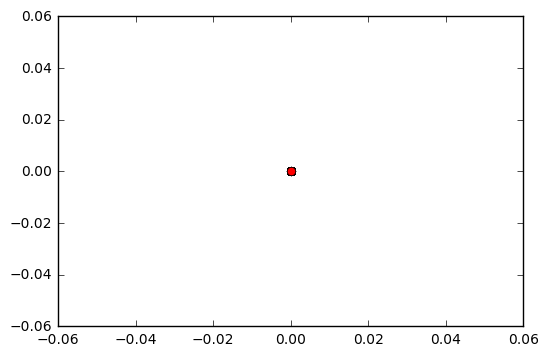

In [34]:
plt.plot(data[0,:], data[1,:], 'ro')
#plt.plot([0,1],[-b/w[1],(b-w[0]*1)/w[1]])

plt.show()

## Herumprobieren